In [1]:
import matplotlib.pyplot as plt
import math
import torch

import sampling_algs # all relevant methods can be found here
import utils # only to import the pointcloud

In [3]:
n_points = int(math.pow(2,13))
train_dataset = utils.import_train(n_points, path=None) # path = relative path to modelnet10 folder
n_points

8192

In [4]:
pos_all = train_dataset.pos

In [5]:
k = 10
ratio = .5
bias = 0.99
batch_size = 32

In [6]:
batch = torch.mul(torch.arange(0,batch_size), torch.ones((n_points, batch_size))).T.reshape(-1).long()

In [7]:
pos = pos_all[:batch_size*n_points] # extract the first batch of clouds

In [9]:
# sampler_args = [k]
# sampler = sampling_algs.max_curve_sampler


sampler_args = [bias, sampling_algs.max_curve_sampler, k]
sampler = sampling_algs.bias_anyvsfps_sampler

idx =  sampling_algs.batch_sampling_coordinator(pos, batch, ratio, sampler, sampler_args) # this method is broken, clouds looks incorrect
idx

/Users/paulhosek/PycharmProjects/GeometricDL/principal_curvature.py:43: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_9d63z49rj_/croot/pytorch_1681837279022/work/aten/src/ATen/native/Copy.cpp:250.)
  eigenvalues = torch.linalg.eigvals(cov).to(torch.float)


tensor([  2334,   2335,   1112,  ..., 254607, 255301, 256433])

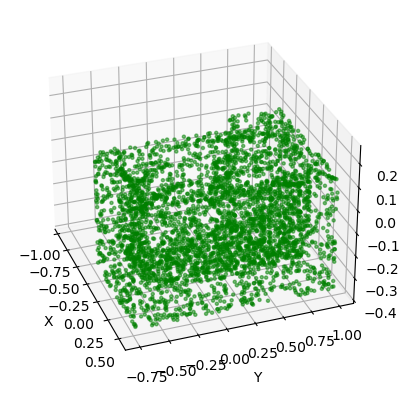

tensor([[-0.7278,  0.9884, -0.1282],
        [ 0.1648, -0.5053, -0.2491],
        [ 0.0548,  0.8994, -0.3700],
        ...,
        [ 0.2349,  0.1176, -0.2491],
        [ 0.1372, -0.5972, -0.0213],
        [ 0.1762, -0.7463, -0.2552]])

In [10]:
cloud = train_dataset[1].pos

res = cloud[idx[:int(ratio*n_points)],:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter3 = ax.scatter(res[:,0], res[:,1], res[:,2], marker='.',alpha=.5,color="green")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# rotate_plot()
ax.view_init(elev=30, azim=340)
plt.show(block=True)
res

In [11]:
%matplotlib qt
h = 1
cloud = train_dataset[h].pos
des_n_points = int(n_points*ratio)
index_range = idx[h* des_n_points: (h)* des_n_points + des_n_points] - int(h*n_points)

print(index_range)
x = cloud[index_range, 0]
y = cloud[index_range, 1]
z = cloud[index_range, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter3 = ax.scatter(x, y, z, marker='.',alpha=.5,color="green")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# rotate_plot()
ax.view_init(elev=30, azim=340)
plt.show(block=True)

tensor([4972, 4971, 4993,  ..., 1311, 1219,  897])


---

#### Max curve sampler in isolation

- the max curve sampler gives the correct pointcloud

In [12]:
ratio = 0.2
cloud = train_dataset[h].pos
des_nr_points = int(ratio*n_points)
test_idxs = sampling_algs.max_curve_sampler(cloud,des_nr_points,k)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter3 = ax.scatter(cloud[test_idxs,0], cloud[test_idxs,1], cloud[test_idxs,2], marker='.',alpha=.5,color="green")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# rotate_plot()
ax.view_init(elev=30, azim=340)
plt.show(block=True)

#### Bias sampler in isolation

- here too the expected pointcloud

In [21]:
h = 1
cloud = train_dataset[h].pos
ratio = .5
bias = .99

des_nr_points = int(ratio*n_points)
test_idxs = sampling_algs.bias_anyvsfps_sampler(cloud,des_nr_points,bias, func1=sampling_algs.max_curve_sampler, args1=k)

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter3 = ax.scatter(cloud[test_idxs,0], cloud[test_idxs,1], cloud[test_idxs,2], marker='.',alpha=.5,color="green")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# rotate_plot()
ax.view_init(elev=30, azim=340)
plt.show(block=True)